In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("sign_mnist_train.csv")
test = pd.read_csv("sign_mnist_test.csv")

In [3]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
#training labels
labels = train['label'].values

In [5]:
#Viewing unique labels
unique_values = np.array(labels)
np.unique(unique_values)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

<Axes: ylabel='count'>

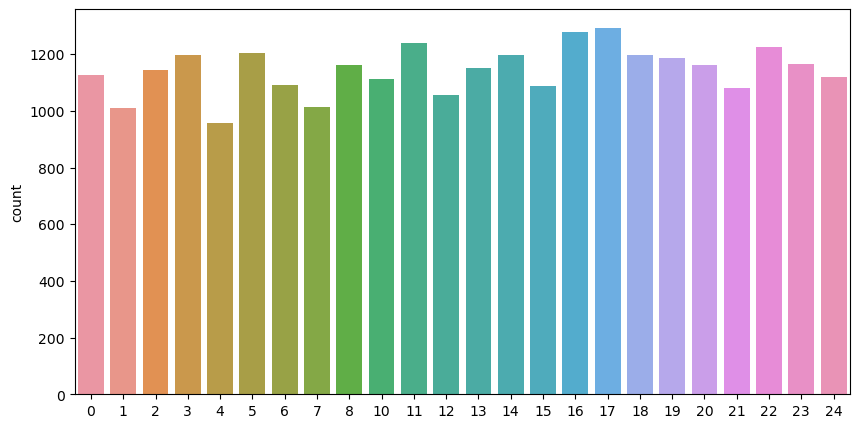

In [6]:
#plotting quantities in each class
plt.figure(figsize=(10,5))
sns.countplot(x = labels)

In [7]:
#dropping training labels to separate it
train.drop('label', axis = 1, inplace = True)

In [8]:
#Extracting image data from each rows
images = train.values
images = np.array([np.reshape(i, (28,28)) for i in images])
images = np.array([i.flatten() for i in images])

In [9]:
#encode one of the labels
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
labels = label_binarizer.fit_transform(labels)

In [10]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


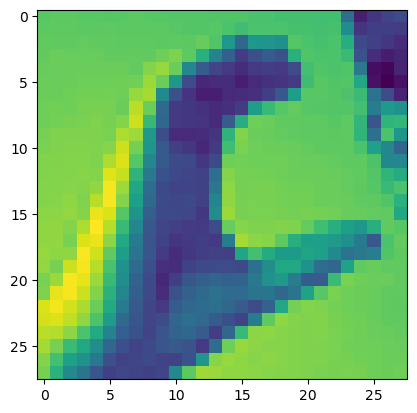

In [11]:
#inspect the image
index = 2
print(labels[index])
plt.imshow(images[index].reshape(28,28))

In [12]:
import numpy as np
import os
import cv2
import random

In [13]:
for i in range(0, 10):
    rand = np.random.randint(0, len(images))
    input_im = images[rand]

    sample = input_im.reshape(28, 28).astype(np.uint8)
    sample = cv2.resize(sample, None, fx=10, fy=10, interpolation=cv2.INTER_CUBIC)
    cv2.imshow("Sample image", sample)
    cv2.waitKey(0)  # Corrected function call
    cv2.destroyAllWindows()

In [20]:
#Split the data into X_train, x_test, y_train, y_test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3, random_state = 101)

In [2]:
#Start loading tensorflow and define batch size
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

batch_size = 128
num_classes = 24
epochs = 10

In [22]:
pip install tensorflow


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [23]:
#Scale the images
x_train = x_train / 255
x_test = x_test / 255

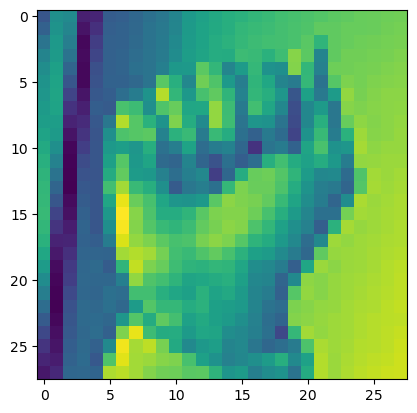

In [24]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0],28, 28, 1)
plt.imshow(x_train[0].reshape(28,28))

In [3]:
#creating CNN model
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.20))

model.add(Dense(num_classes, activation='softmax'))




In [29]:
# Compile our model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])


In [30]:
print(model.summary())

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 24)             │         3,096 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 85,912 (335.59 KB)

 Trainable params: 85,912 (335.59 KB)

 Non-trainable params: 0 (0.00 B)

None


In [31]:
#Train the model
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 29s 159ms/step - accuracy: 0.1019 - loss: 2.9993 - val_accuracy: 0.4169 - val_loss: 1.8165
Epoch 2/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 23s 153ms/step - accuracy: 0.4399 - loss: 1.6641 - val_accuracy: 0.6802 - val_loss: 0.9918
Epoch 3/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 38s 130ms/step - accuracy: 0.6647 - loss: 0.9791 - val_accuracy: 0.7765 - val_loss: 0.6460
Epoch 4/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 104s 692ms/step - accuracy: 0.7761 - loss: 0.6533 - val_accuracy: 0.8821 - val_loss: 0.4043
Epoch 5/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 19s 128ms/step - accuracy: 0.8464 - loss: 0.4540 - val_accuracy: 0.9302 - val_loss: 0.2510
Epoch 6/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 22s 138ms/step - accuracy: 0.8924 - loss: 0.3211 - val_accuracy: 0.9516 - val_loss: 0.1756
Epoch 7/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 124s 826ms/step - accuracy: 0.9348 - loss: 0.2159 - val_accuracy: 0.9749 - val_loss: 0.1112
Epoch 8/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 13s 88ms/step - accuracy: 0.9566 - loss: 

In [33]:
#Save the model
model.save("sign_mnist_cnn_50_Epochs.h5")
print("Model Saved")

Model Saved


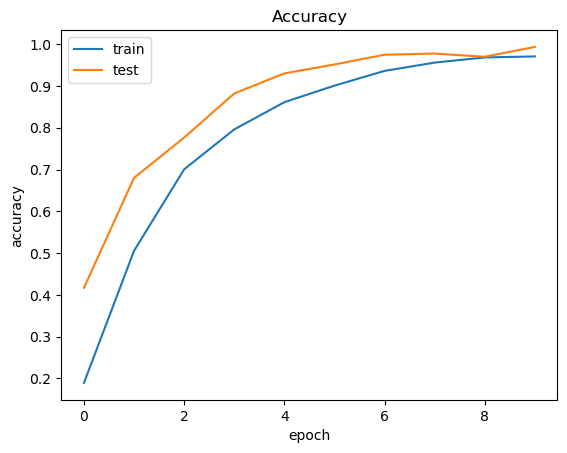

In [34]:
#Printing the Training History Graphically
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(['train', 'test'])
plt.show()

In [54]:
#Reshaping the test data to evaluate its performance on unseen data

from sklearn.preprocessing import LabelBinarizer

# Define and initialize LabelBinarizer object
label_binarizer = LabelBinarizer()

# Transform test labels using LabelBinarizer
test_labels = label_binarizer.fit_transform(test_labels)

# Reshape test images
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

# Print the shape of test images
print(test_images.shape)


(7172, 28, 28, 1)


In [55]:
y_pred = model.predict(test_images)

225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [56]:
# Accuracy score
from sklearn.metrics import accuracy_score

# Calculate accuracy score
accuracy = accuracy_score(test_labels, y_pred.round())
print("Accuracy:", accuracy)

Accuracy: 0.8027049637479086


In [36]:
from sklearn.preprocessing import LabelBinarizer

# Assume the label binarizer object is defined as 'label_binarizer'
label_binarizer = LabelBinarizer()

# Use the label binarizer to transform test labels
test_labels = label_binarizer.fit_transform(test_labels)


In [1]:
#Create function to watch label to letter
def getletter(result):
    classLabels = { 0:  'A',
                    1:  'B',
                    2:  'C',
                    3:  'D',
                    4:  'E',
                    5:  'F',
                    6:  'G',
                    7:  'H',
                    8:  'I',
                    9:  'K',
                    10: 'L',
                    11: 'M',
                    12: 'N',
                    13: 'O',
                    14: 'P',
                    15: 'Q',
                    16: 'R',
                    17: 'S',
                    18: 'T',
                    19: 'U',
                    20: 'V',
                    21: 'W',
                    22: 'X',
                    23: 'Y'}
    try:
        res = int(result)
        return classLabels[res]
        return letters[int(result)]
    except:
        return "Error"


TEST ON ACTUAL WEBCAM INPUT

In [2]:
import cv2

In [5]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    # Other layers...
])


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

# Define your model architecture
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # Assuming 10 classes for hand gestures
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model (you should have training data)
# model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


In [6]:
from tensorflow.keras.layers import Input

input_shape = (28, 28, 1)
inputs = Input(shape=input_shape)
model = Sequential([
    inputs,
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    # Other layers...
])


In [5]:
import numpy as np
import cv2

In [ ]:
def getLetter(result):
    letters = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 
               'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
    return letters[int(result)]


In [6]:

cap = cv2.VideoCapture(0)
counter = 0  # Counter to track the number of predictions made

while True:
    ret, frame = cap.read()
    
    # Define region of interest
    roi = frame[100:400, 320:620]
    cv2.imshow('roi', roi)
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    roi = cv2.resize(roi, (28, 28), interpolation=cv2.INTER_AREA)

    cv2.imshow('roi scaled and gray', roi)
    copy = frame.copy()
    cv2.rectangle(copy, (320, 100), (620, 400), (255, 0, 0), 5)
    
    roi = roi.reshape(1, 28, 28, 1)

    probabilities = model.predict(roi)
    result = str(np.argmax(probabilities))
    
    # Display the predicted letter
    letter = getLetter(result)
    cv2.putText(copy, letter, (300, 100), cv2.FONT_HERSHEY_COMPLEX, 2, (0, 255, 0), 2)
    cv2.imshow('frame', copy)
    
    # Increment counter after each prediction
    counter += 1
    
    if cv2.waitKey(1) == 13 or counter == 2:  # Exit if 'Enter' key pressed or 2 predictions made
        break

cap.release()
cv2.destroyAllWindows()



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step


NameError: name 'getLetter' is not defined

In [ ]:
break

In [1]:
import cv2
import numpy as np

# Assuming 'model' is defined and initialized earlier in your code

cap = cv2.VideoCapture(0)
counter = 0  # Counter to track the number of predictions made

while True:
    ret, frame = cap.read()
    
    # Define region of interest
    roi = frame[100:400, 320:620]
    cv2.imshow('roi', roi)
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    roi = cv2.resize(roi, (28, 28), interpolation=cv2.INTER_AREA)

    cv2.imshow('roi scaled and gray', roi)
    copy = frame.copy()
    cv2.rectangle(copy, (320, 100), (620, 400), (255, 0, 0), 5)
    
    roi = roi.reshape(1, 28, 28, 1)

    probabilities = model.predict(roi)
    result = str(np.argmax(probabilities))
    
    # Display the predicted letter
    letter = getLetter(result)
    cv2.putText(copy, letter, (300, 100), cv2.FONT_HERSHEY_COMPLEX, 2, (0, 255, 0), 2)
    cv2.imshow('frame', copy)
    
    # Increment counter after each prediction
    counter += 1
    
    if cv2.waitKey(1) == 13 or counter == 2:  # Exit if 'Enter' key pressed or 2 predictions made
        break

cap.release()
cv2.destroyAllWindows()


NameError: name 'model' is not defined